In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import json


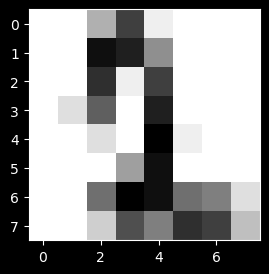

In [2]:
# Load the digits dataset
digits = datasets.load_digits()

# Display the last digit
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[12], cmap=plt.cm.gray_r, interpolation="nearest")
plt.show()

In [3]:
encoder = preprocessing.LabelBinarizer()
encoder.fit(digits.target)
target = encoder.transform(digits.target)
x_train, x_test, y_train, y_test = train_test_split(digits.data, target, test_size=0.25, random_state=0)


print(f"x_train: {x_train.shape}")
print(f"x_test: {x_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

x_train: (1347, 64)
x_test: (450, 64)
y_train: (1347, 10)
y_test: (450, 10)


In [4]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=64))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10


2022-08-31 19:57:59.281090: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-31 19:57:59.305654: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-31 19:57:59.305799: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-31 19:57:59.306289: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

43/43 [==============================] - 1s 1ms/step - loss: 2.2855 - accuracy: 0.4826
Epoch 2/10
43/43 [==============================] - 0s 1ms/step - loss: 0.6480 - accuracy: 0.8092
Epoch 3/10
43/43 [==============================] - 0s 1ms/step - loss: 0.3706 - accuracy: 0.8834
Epoch 4/10
 1/43 [..............................] - ETA: 0s - loss: 0.2482 - accuracy: 0.9062

2022-08-31 19:58:00.618185: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


43/43 [==============================] - 0s 1ms/step - loss: 0.2324 - accuracy: 0.9235
Epoch 5/10
43/43 [==============================] - 0s 1ms/step - loss: 0.1694 - accuracy: 0.9421
Epoch 6/10
43/43 [==============================] - 0s 1ms/step - loss: 0.1181 - accuracy: 0.9688
Epoch 7/10
43/43 [==============================] - 0s 1ms/step - loss: 0.0992 - accuracy: 0.9703
Epoch 8/10
43/43 [==============================] - 0s 1ms/step - loss: 0.0775 - accuracy: 0.9792
Epoch 9/10
43/43 [==============================] - 0s 1ms/step - loss: 0.0609 - accuracy: 0.9814
Epoch 10/10
43/43 [==============================] - 0s 1ms/step - loss: 0.0509 - accuracy: 0.9889


In [9]:
model.save("model_save")
model_json = model.to_json()
model_json = json.loads(model_json)
# dump json
with open("model_save.json", "w") as json_file:
    json.dump(model_json, json_file, indent=4)

INFO:tensorflow:Assets written to: model_save/assets
